#Аналіз Даних (EDA)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Завантаження датасету
df = pd.read_csv('data/internet_service_churn.csv')

#Загальна інформація про датасет

In [5]:
df.head(5) # Виведення перших 5 рядків

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,34,0,0,6.39,0,NaN,0,0.0,0.0,0,1


In [6]:
df.shape

(72274, 11)

In [7]:
# Виведення назв колонок
df.columns

Index(['id', 'is_tv_subscriber', 'is_movie_package_subscriber',
       'subscription_age', 'bill_avg', 'reamining_contract',
       'service_failure_count', 'download_avg', 'upload_avg',
       'download_over_limit', 'churn'],
      dtype='object')

In [8]:
# Перевірка кількості дублікатів
print("Кількість дублікатів:", df.duplicated().sum())

Кількість дублікатів: 0


In [9]:
# Виведення транспонованої таблиці статистичних характеристик датасету
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,72274.0,846318.243462,489102.168744,15.00,422216.50,847784.00,1269562.00,1689744.00
is_tv_subscriber,72274.0,0.815259,0.388090,0.00,1.00,1.00,1.00,1.00
is_movie_package_subscriber,72274.0,0.334629,0.471864,0.00,0.00,0.00,1.00,1.00
subscription_age,72274.0,2.450051,2.034990,-0.02,0.93,1.98,3.30,12.80
bill_avg,72274.0,18.942483,13.215386,0.00,13.00,19.00,22.00,406.00
reamining_contract,50702.0,0.716039,0.697102,0.00,0.00,0.57,1.31,2.92
service_failure_count,72274.0,0.274234,0.816621,0.00,0.00,0.00,0.00,19.00
download_avg,71893.0,43.689911,63.405963,0.00,6.70,27.80,60.50,4415.20
upload_avg,71893.0,4.192076,9.818896,0.00,0.50,2.10,4.80,453.30
download_over_limit,72274.0,0.207613,0.997123,0.00,0.00,0.00,0.00,7.00


# Аналіз отриманого результату

In [10]:
# Виведення негативних значень
df[(df['subscription_age'] < 0)]

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
69320,1621523,0,0,-0.02,0,0.08,0,32.6,1.3,0,1


#Оскільки було виявлено лише один запис із негативним значенням subscription_age, його можна видалити. Це ніяк не вплине на навчання моделі.

#Для змінних із великими розмахами (bill_avg, download_avg, upload_avg) може бути корисною стандартизація.

#Максимальні значення можуть бути використані в розробці інтерфейсу для обмеження введення даних нового клієнта.

In [11]:
# Перевірка на унікальність
df.nunique()

,0
id,72274
is_tv_subscriber,2
is_movie_package_subscriber,2
subscription_age,1110
bill_avg,179
reamining_contract,247
service_failure_count,19
download_avg,2856
upload_avg,802
download_over_limit,8


In [12]:
df['churn'].value_counts()

,count
churn,
1,40050
0,32224


In [13]:
# Виявлення відсутніх значень
missing_summary = pd.DataFrame({
    'Missing Count': df.isnull().sum(),
    'Missing Percentage': ((df.isnull().sum() / len(df)) * 100).round(2)
})
missing_summary.sort_values(by='Missing Count', ascending=False)

,Missing Count,Missing Percentage
reamining_contract,21572,29.85
download_avg,381,0.53
upload_avg,381,0.53
is_movie_package_subscriber,0,0.00
is_tv_subscriber,0,0.00
id,0,0.00
subscription_age,0,0.00
service_failure_count,0,0.00
bill_avg,0,0.00
download_over_limit,0,0.00


# Найбільше відсутніх значень має remaining_contract – це, ймовірно, клієнти, які не мали контракту, тому доцільно замінити пропущені значення на нуль. Відсутність однакової кількості значень у download_avg та upload_avg, а також їхній невеликий відсоток від загальної кількості (0,53%), свідчить про те, що ці пропуски можна видалити або замінити на середнє значення чи моду.

In [14]:
df.groupby(['reamining_contract'])['churn'].count()

,churn
reamining_contract,
0.00,16363
0.01,470
0.02,334
0.03,185
0.04,220
...,...
2.78,3
2.79,1
2.84,2


#У більшості клієнтів контракти відсутні  або закінчуються (значення близькі до 0), а клієнтів з довшими термінами контрактів (2+ одиниці) дуже мало.

#Аналіз безперервних змінних

In [15]:
# Розділяємо бінарні та безперервні змінні
continuous_columns = ['subscription_age', 'bill_avg', 'reamining_contract',
       'service_failure_count', 'download_avg', 'upload_avg',
       'download_over_limit']
binary_columns = ['is_tv_subscriber', 'is_movie_package_subscriber']

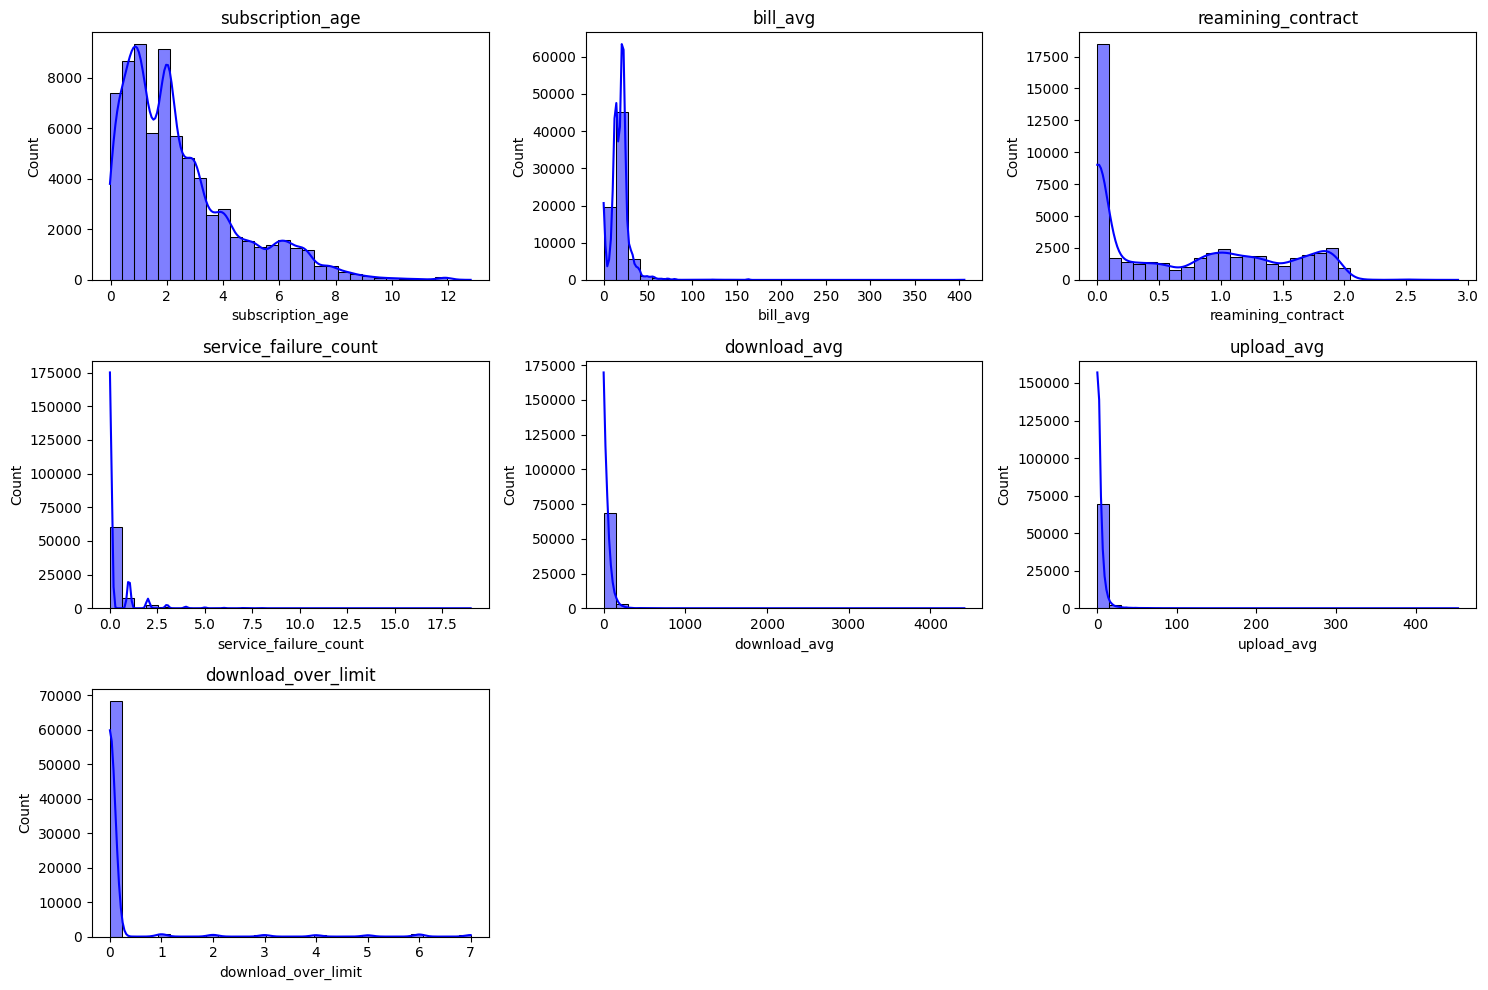

In [16]:
# Візуалізація гістограм
plt.figure(figsize=(15, 10))
for i, col in enumerate(continuous_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], bins=30, kde=True, color='blue')
    plt.title(col)
plt.tight_layout()
plt.show()

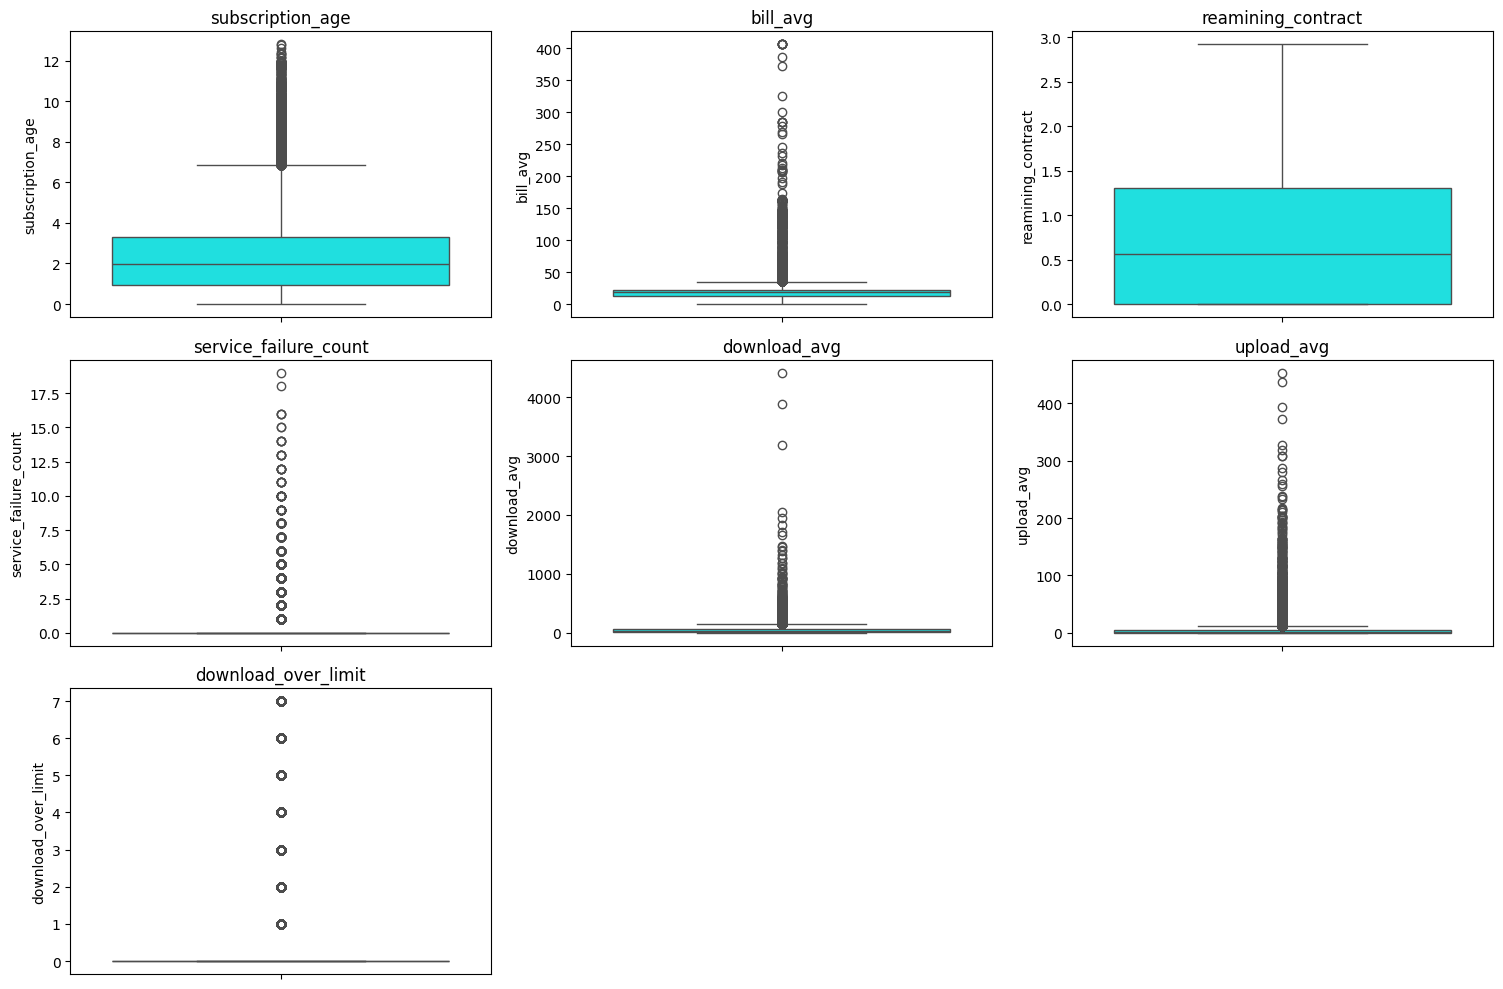

In [18]:
# Візуалізація викидів
plt.figure(figsize=(15, 10))
for i, col in enumerate(continuous_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col], color='cyan')
    plt.title(col)
plt.tight_layout()
plt.show()

#Виявлено викиди у більшості ознак - їх можна обрізати або трасформувати, абож використовувати нечутливі до викидів моделі.

# Деякі змінні мають нестандартний розподіл - можна застосувати логарифмічне перетворення  для ознак з правосторонньою асиметрією.


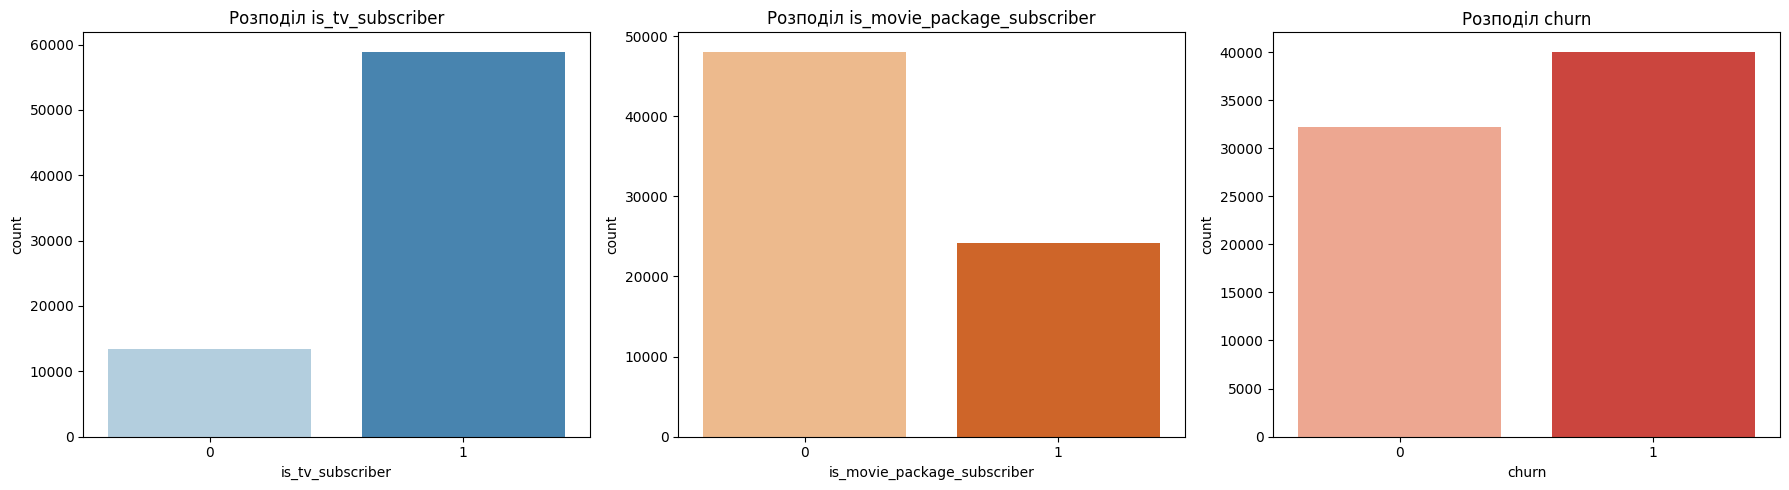

In [19]:
# Візуалізація розподілів бінарних змінних
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.countplot(x='is_tv_subscriber', data=df, ax=axes[0], palette='Blues')
axes[0].set_title('Розподіл is_tv_subscriber')
sns.countplot(x='is_movie_package_subscriber', data=df, ax=axes[1], palette='Oranges')
axes[1].set_title('Розподіл is_movie_package_subscriber')
sns.countplot(x='churn', data=df, ax=axes[2], palette='Reds')
axes[2].set_title('Розподіл churn')
plt.tight_layout()
plt.show()

In [20]:
# Агрегація по групах для порівняння відтоку між ознаками
df.groupby(['is_tv_subscriber', 'is_movie_package_subscriber'])['churn'].mean().reset_index()

,is_tv_subscriber,is_movie_package_subscriber,churn
0,0,0,0.896180
1,0,1,1.000000
2,1,0,0.572584
3,1,1,0.338792


In [21]:
df.groupby(['is_tv_subscriber', 'is_movie_package_subscriber'])['churn'].count()

is_tv_subscriber  is_movie_package_subscriber
0                 0                              13350
                  1                                  2
1                 0                              34739
                  1                              24183
Name: churn, dtype: int64

#Найвищий рівень відтоку спостерігається у клієнтів без жодної підписки (0, 0) – 89.6%.

Двоє клієнтів, які мають тільки підписку на фільмовий пакет (0, 1) ми до уваги не беремо.

#Найнижчий рівень відтоку  – 33.9% у клієнтів, які мають обидві підписки (1, 1).

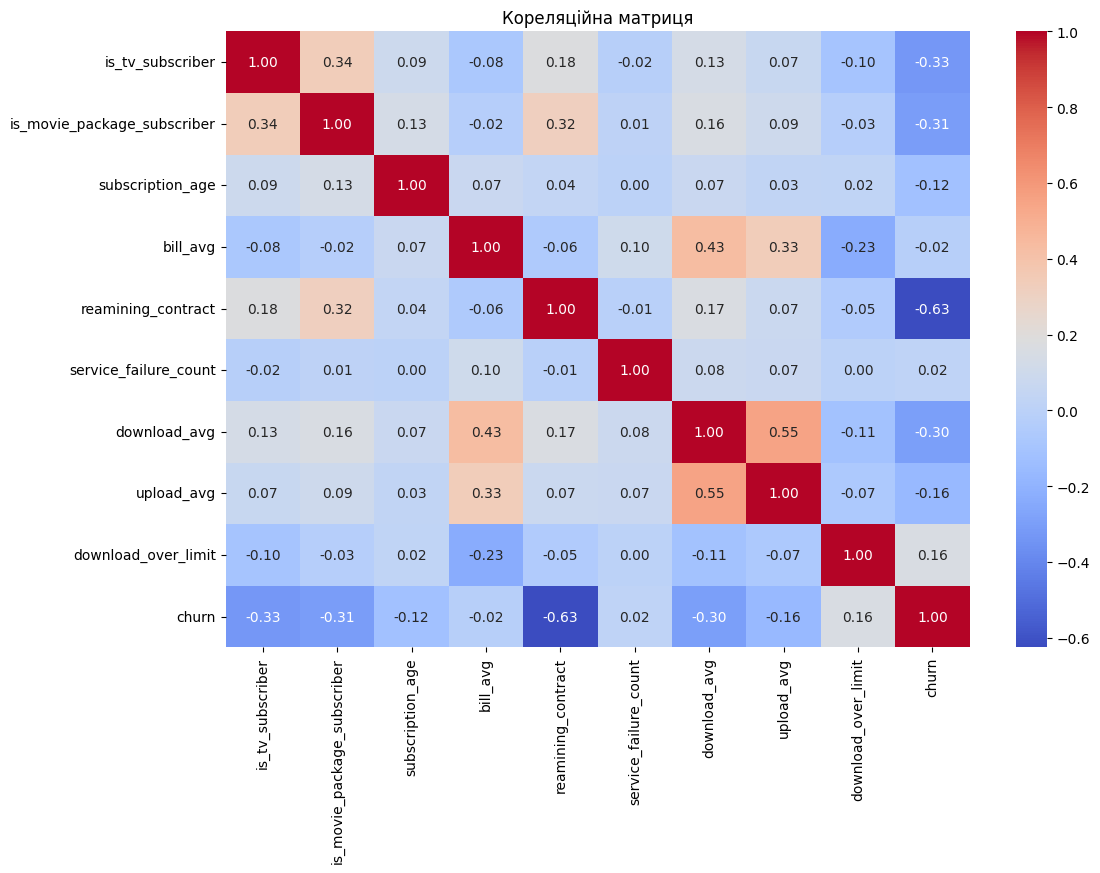

In [22]:
# Аналіз кореляцій (виключаємо "id")
plt.figure(figsize=(12,8))
sns.heatmap(df.drop(columns=['id']).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Кореляційна матриця')
plt.show()

#Cпостерігається сильна негативна кореляція між reamining_contract та churn (-0.63), це говорить нам про те, що чим довший контракт тим меньша ймовірність відтоку клієнтів. Це підтверджує попередні спостереження.


#Між download_avg та upload_avg кореляція позитивна (0.55) і це виглядає логічно, оскільки активні користувачі як передають так і приймають великі обсяги даних. Хоч змінні між собою і корелюють, але їх можна залишити обидві, оскільки кореляція не перевищує 0.8

#bill_avg корелює з download_avg (0.43) та з  reamining_contract (0.33) що говорить нам про те що чим більший рахунок за останні три місяці отримує клієнт тим активніше він користується інтернетом або без підписки абож користується довгостроковими контрактами, оскільки також спостерігається негативна кореляція між  bill_avg та download_over_limit (-0.23)

#is_tv_subscriber, is_movie_package_subscriber та download_avg мають приблизно однакову невисоку негативну кореляцію з churn. Це говорить про те що додаткові послуги та активне користування інтернетом привязують клієнтів та запобігають їх відтоку.